# House Price Prediction 

#### reading dataset

In [118]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [119]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [120]:
df = pd.concat([train_df, test_df], ignore_index =True)

In [121]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [122]:
y = df.SalePrice
df = df.drop("SalePrice", axis=1)

In [123]:
y_train = y[:1460]
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [125]:
df_num = df.select_dtypes(np.number)
len(df_num)

2919

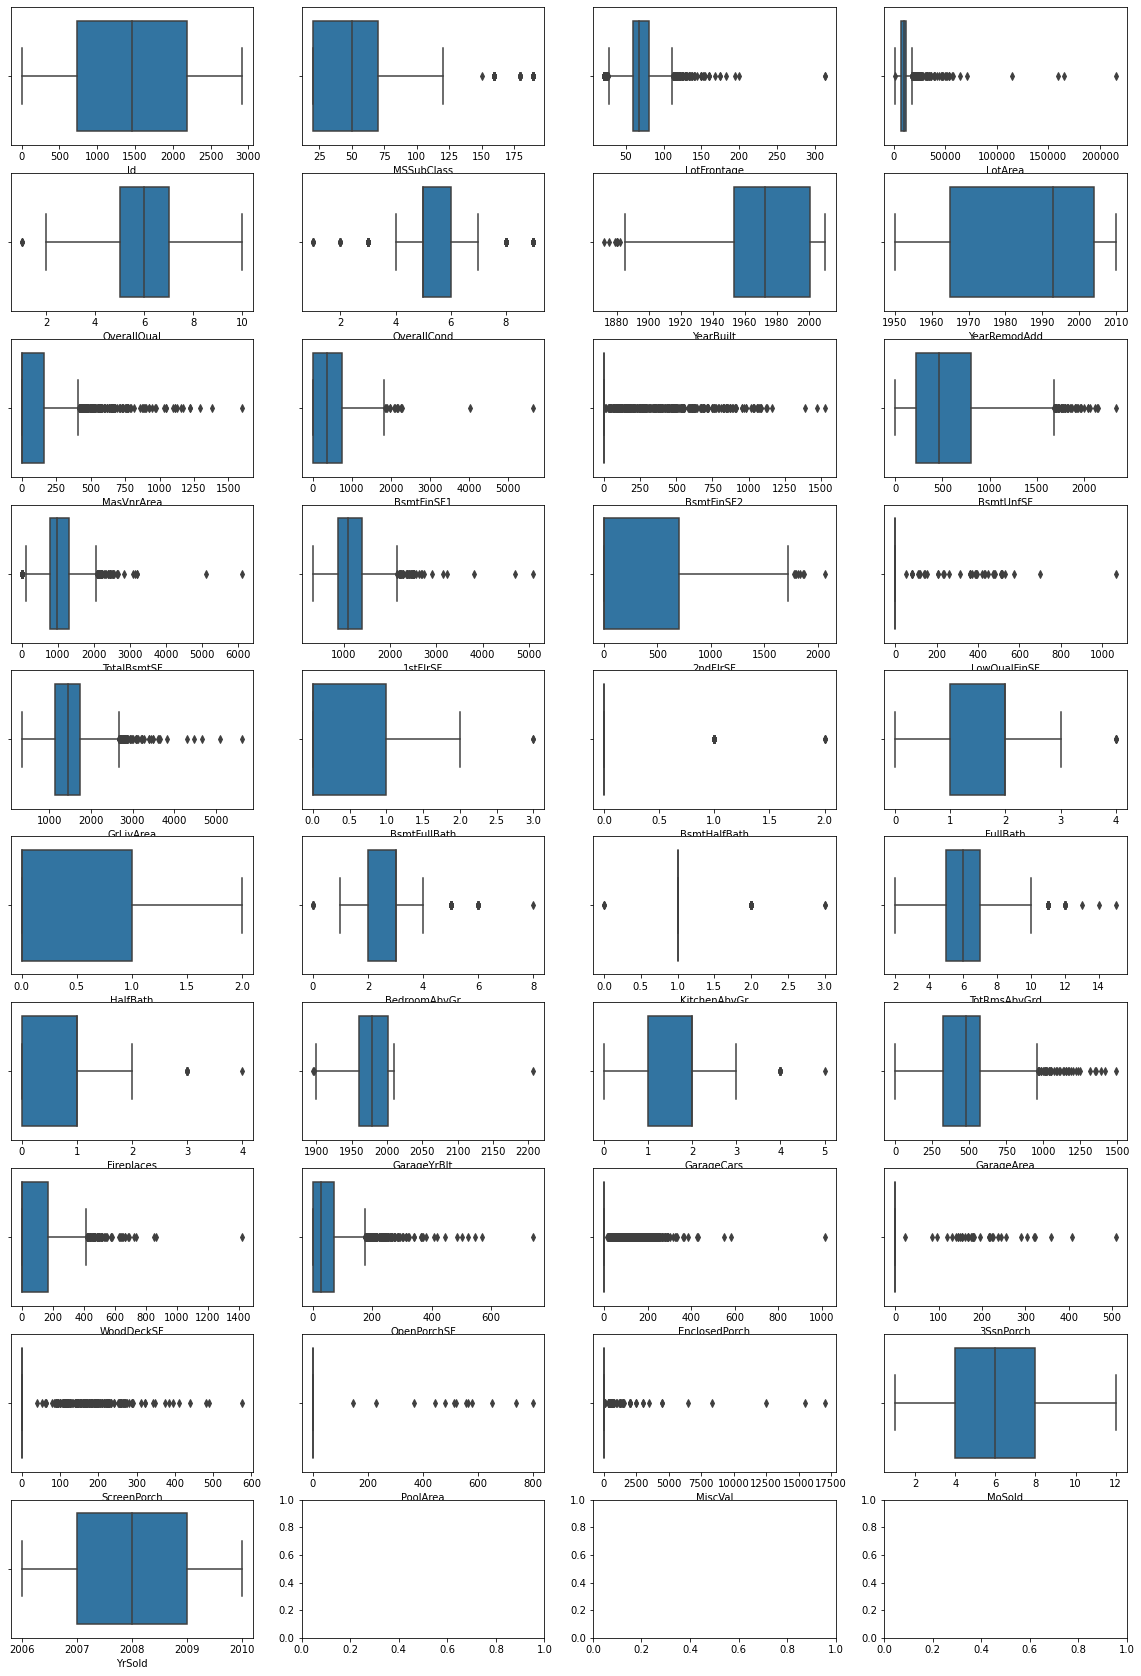

In [126]:
df_num = df.select_dtypes(np.number)

fig, ax = plt.subplots(nrows =10, ncols=4, figsize=(20, 30))
for i, subplot in zip(df_num.columns,  ax.flatten()):
    sns.boxplot(df[i], ax=subplot) 
    #in case of odd number of plots
plt.show()

In [127]:
len(df.select_dtypes(np.object).columns)

43

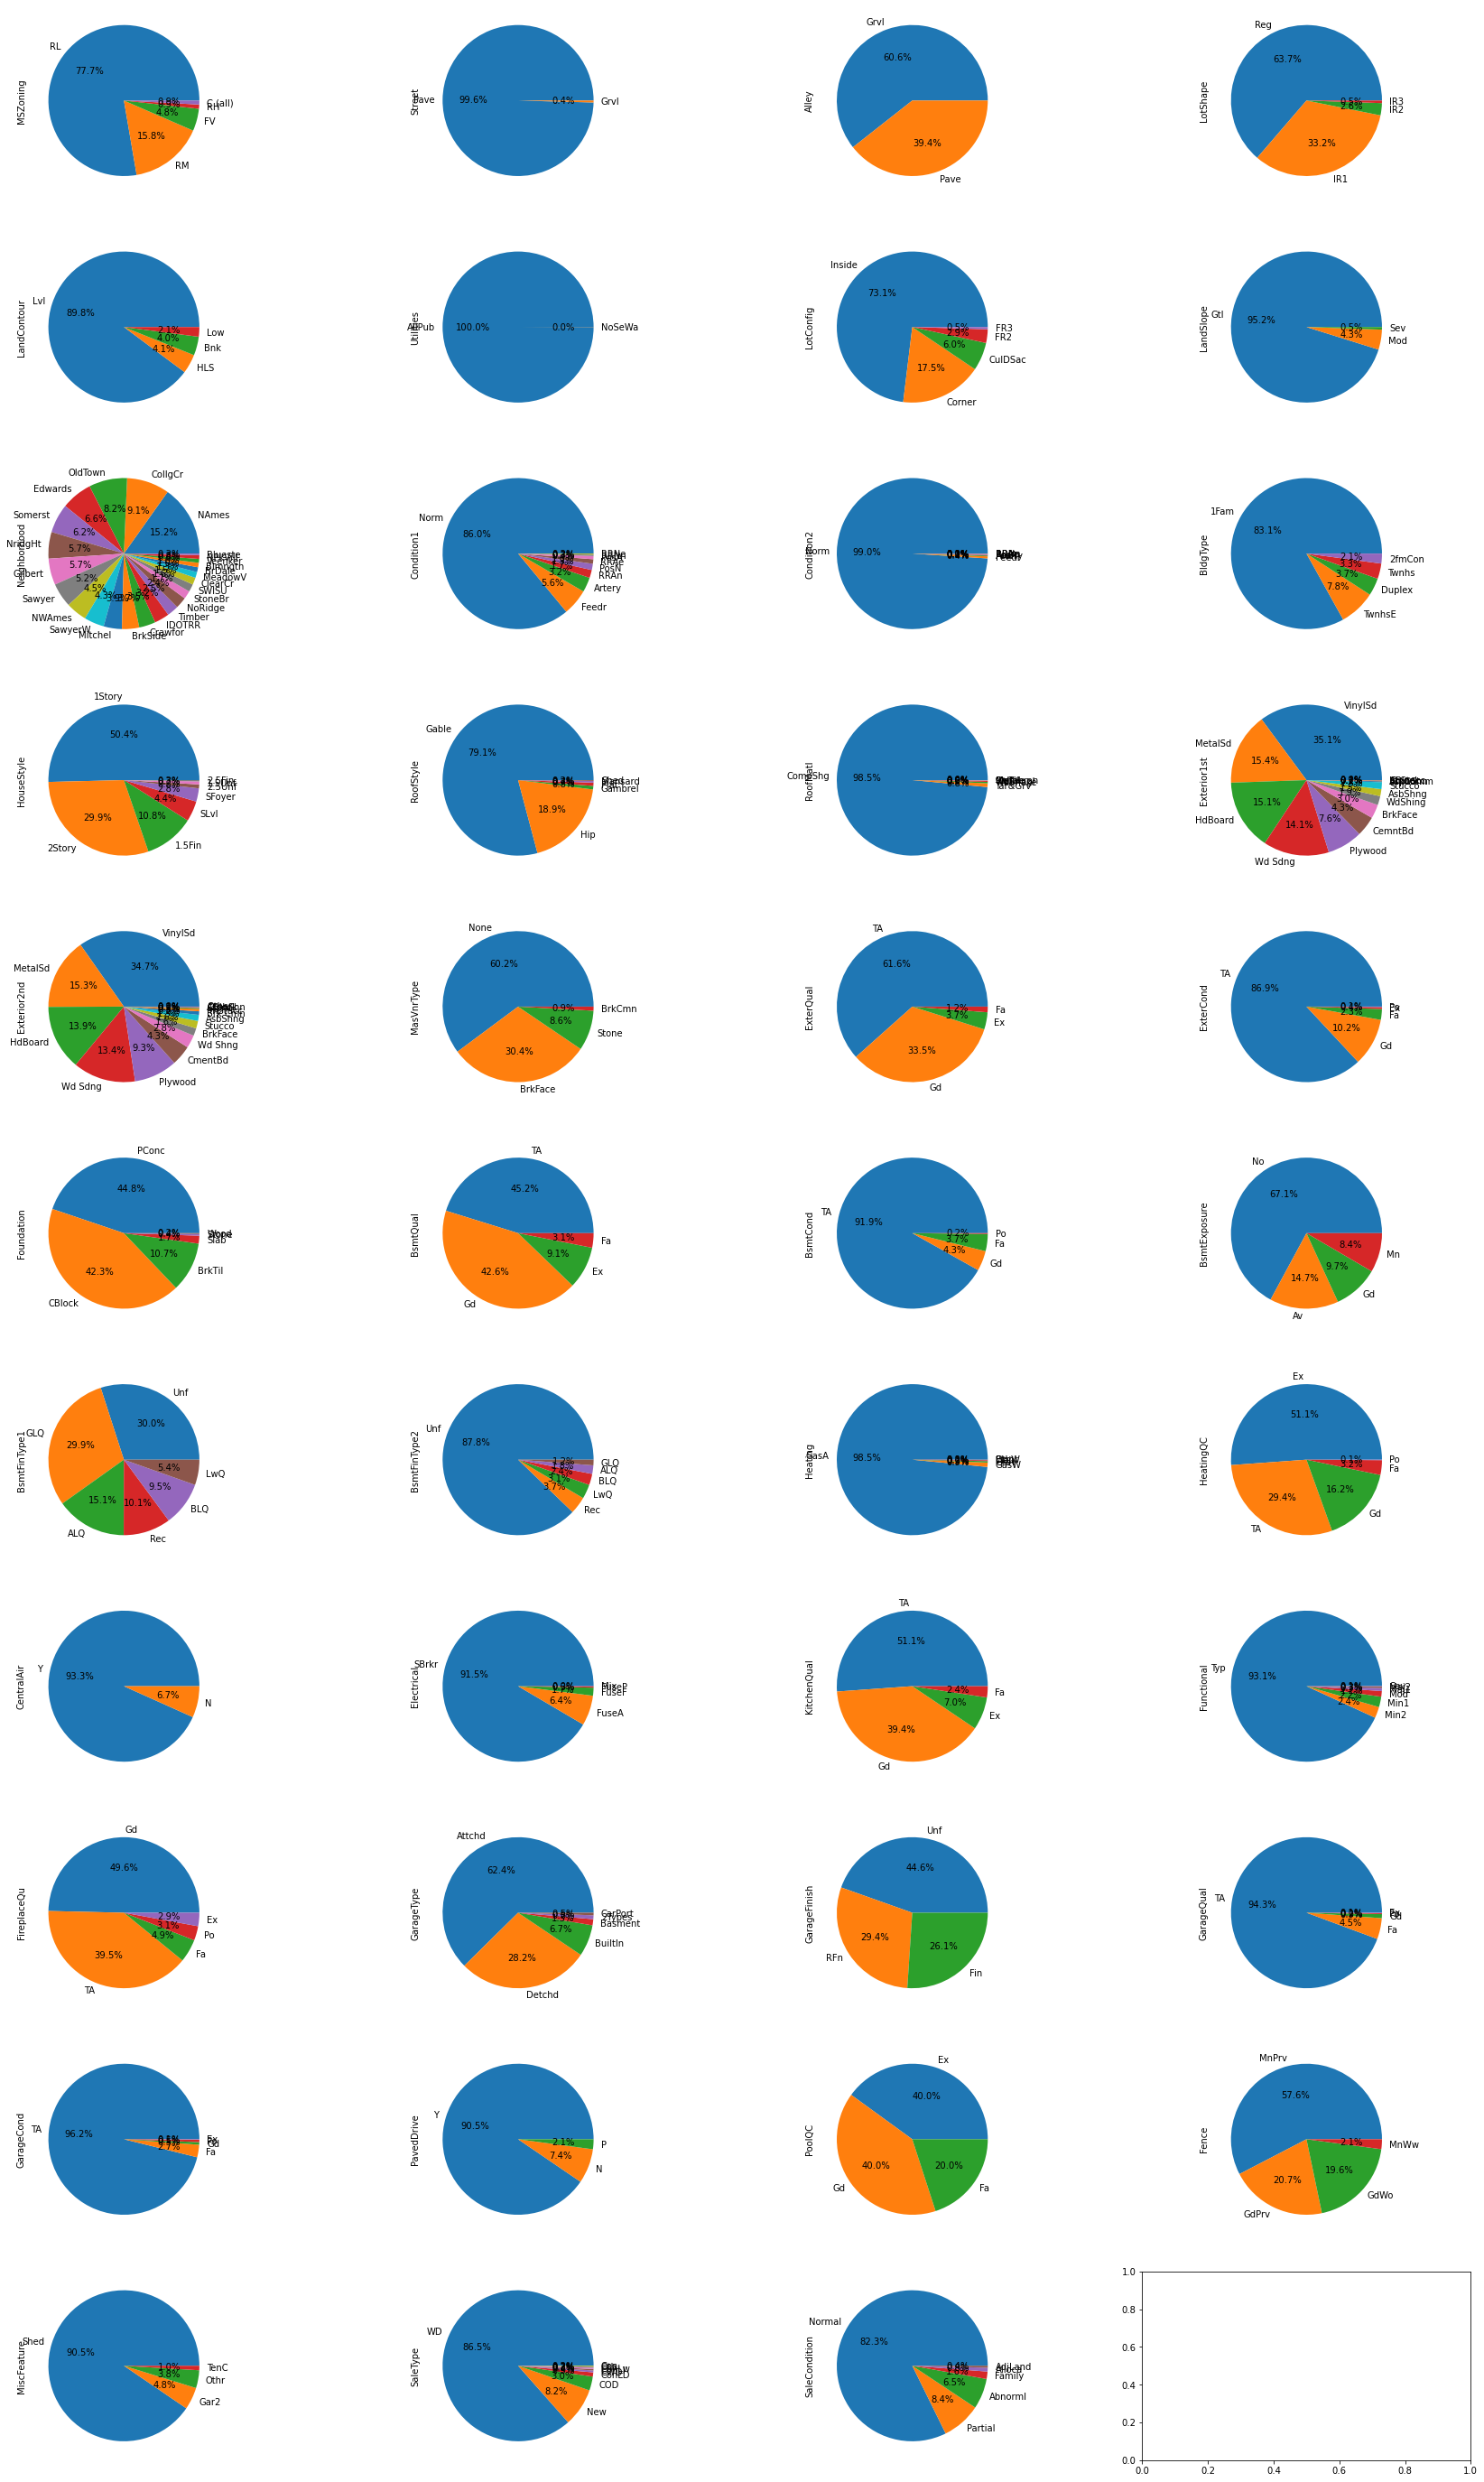

In [128]:
from matplotlib.pyplot import legend


df_cat = df.select_dtypes(np.object).columns
fig, ax = plt.subplots(nrows = 11, ncols=4, figsize=(30, 50))
for i, subplot in zip(df_cat, ax.flatten()):
    (pd.DataFrame(df[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot, legend= False)
plt.show()

# Missing Value Treatment

In [129]:
nullvaluesanalysis = pd.DataFrame(df.isnull().sum())
nullvaluesanalysis[nullvaluesanalysis [0] != 0].sort_values(0, ascending=False)

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageQual,159
GarageCond,159
GarageYrBlt,159


In [130]:
# PoolQC = 1453
df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [131]:
df.PoolQC = df.PoolQC.replace(np.nan, "NA")

In [132]:
# MiscFeature
df.MiscFeature = df.MiscFeature.replace(np.nan, "NA")

In [133]:
# Alley
df.Alley = df.Alley.replace(np.nan, "NA")

In [134]:
# Fence
df.Fence = df.Fence.replace(np.nan, "NA")

In [135]:
# FireplaceQu	
df.FireplaceQu = df.FireplaceQu.replace(np.nan, "NA")

In [136]:
# LotFrontage 
# Assuming it is depends on Lot Area
df.drop("LotFrontage", axis=1, inplace= True)

In [137]:
# Garage Variables

# GarageType
df.GarageType = df.GarageType.replace(np.nan, "NA")
# GarageYrBlt
df.drop("GarageYrBlt", axis=1, inplace= True) # most Garage yr blt are same as year house build

In [138]:
df.GarageFinish = df.GarageFinish.replace(np.nan, "NA")

In [139]:
len(df[df.GarageQual == df.GarageCond])

2610

In [140]:
df.GarageQual = df.GarageQual.replace(np.nan, "NA")


In [141]:
df.drop("GarageCond", axis=1, inplace= True)

In [142]:
df.BsmtExposure = df.BsmtExposure.replace(np.nan, "NA")

In [143]:
df.BsmtFinType1 = df.BsmtFinType1.replace(np.nan, "NA")

In [144]:
df.BsmtFinType2 = df.BsmtFinType2.replace(np.nan, "NA")

In [145]:
len(df[df.BsmtQual == df.BsmtCond])

1265

In [146]:
df.BsmtQual = df.BsmtQual.replace(np.nan, "NA")
df.BsmtCond = df.BsmtCond.replace(np.nan, "NA")

In [147]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [148]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [149]:
df.MasVnrType = df.MasVnrType.fillna("None")

In [150]:
df.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [151]:
df.Electrical = df.Electrical.fillna("SBrkr")

In [152]:
nullvaluesanalysis = pd.DataFrame(df.isnull().sum())
nullvaluesanalysis[nullvaluesanalysis [0] != 0].sort_values(0, ascending=False)

,0
MSZoning,4
Utilities,2
BsmtFullBath,2
BsmtHalfBath,2
Functional,2
Exterior1st,1
Exterior2nd,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1


In [153]:
df['MSZoning'] = df.MSZoning.replace(np.nan, "RL")
df['Utilities'] = df.Utilities.replace(np.nan, "AllPub")
df['BsmtFullBath'] = df.BsmtFullBath.replace(np.nan, 1)
df['BsmtHalfBath'] = df.BsmtHalfBath.replace(np.nan, 1)
df['Functional'] = df.Functional.replace(np.nan, "Mod")
df['Exterior1st'] = df.Exterior1st.replace(np.nan, "ImStucc")
df['Exterior2nd'] = df.Exterior2nd.replace(np.nan, "ImStucc")
df['BsmtFinSF1'] = df.BsmtFinSF1.replace(np.nan, np.mean(df['BsmtFinSF1']))
df['BsmtFinSF2'] = df.BsmtFinSF2.replace(np.nan, np.mean(df['BsmtFinSF2']))
df['BsmtUnfSF'] = df.BsmtUnfSF.replace(np.nan, np.mean(df['BsmtUnfSF']))
df['TotalBsmtSF'] = df.TotalBsmtSF.replace(np.nan, np.mean(df['TotalBsmtSF']))
df['KitchenQual'] = df.KitchenQual.replace(np.nan, "TA")
df['GarageCars'] = df.GarageCars.replace(np.nan, np.mean(df['GarageCars']))
df['GarageArea'] = df.GarageArea.replace(np.nan, np.mean(df['GarageArea']))
df['SaleType'] = df.SaleType.replace(np.nan, "COD")

In [154]:
nullvaluesanalysis = pd.DataFrame(df.isnull().sum())
nullvaluesanalysis[nullvaluesanalysis [0] != 0].sort_values(0, ascending=False)

,0


In [155]:
# finding correlating between Numerical Variables

<AxesSubplot:>

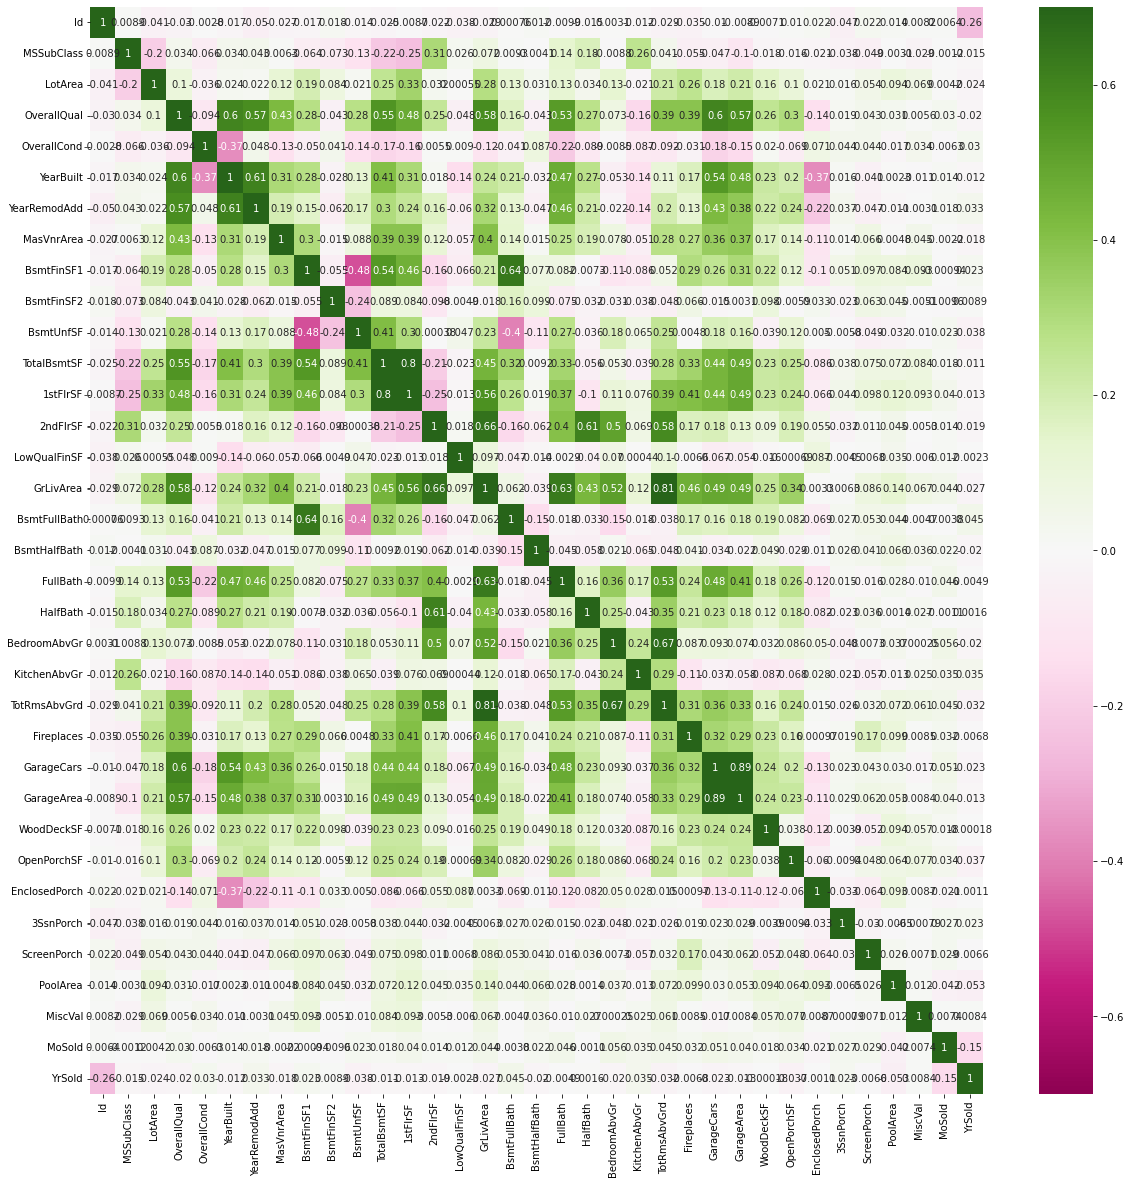

In [156]:
df_num = df.select_dtypes(np.number)
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), cmap= "PiYG", annot=True, vmin= -0.70, vmax= 0.70)

In [157]:
df['tbas'] = df.BsmtFinSF1 + df.BsmtFinSF2 + df.BsmtUnfSF

<AxesSubplot:>

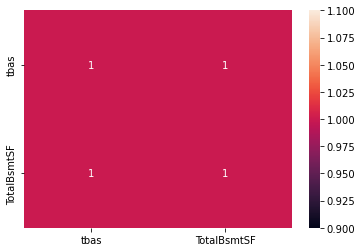

In [158]:
sns.heatmap((df[["tbas", "TotalBsmtSF"]]).corr(), annot=True)

In [159]:
# from the above plot we can see that TotalBsmtSF is sum of df.BsmtFinSF1 + df.BsmtFinSF2 + df.BsmtUnfSF
# thus dropping Total all the three columns becoz TotalBsmtSF is highly correlated with target variable

In [160]:
# Removing Multicollinear Columns
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

In [161]:
df.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [162]:
df.drop('GarageCars', axis=1, inplace=True)

In [163]:
# Combining 1st floor and 2nd floor area 
df["totalabvgrdSF"] = df['1stFlrSF'] + df['2ndFlrSF'] 
df.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [164]:
# totalabvgrdSF is equal to GrLivArea Thus we dropping totalabvgrdSF
df.drop('totalabvgrdSF', axis=1, inplace=True)

In [165]:
df.drop('tbas', axis=1, inplace=True)

<AxesSubplot:>

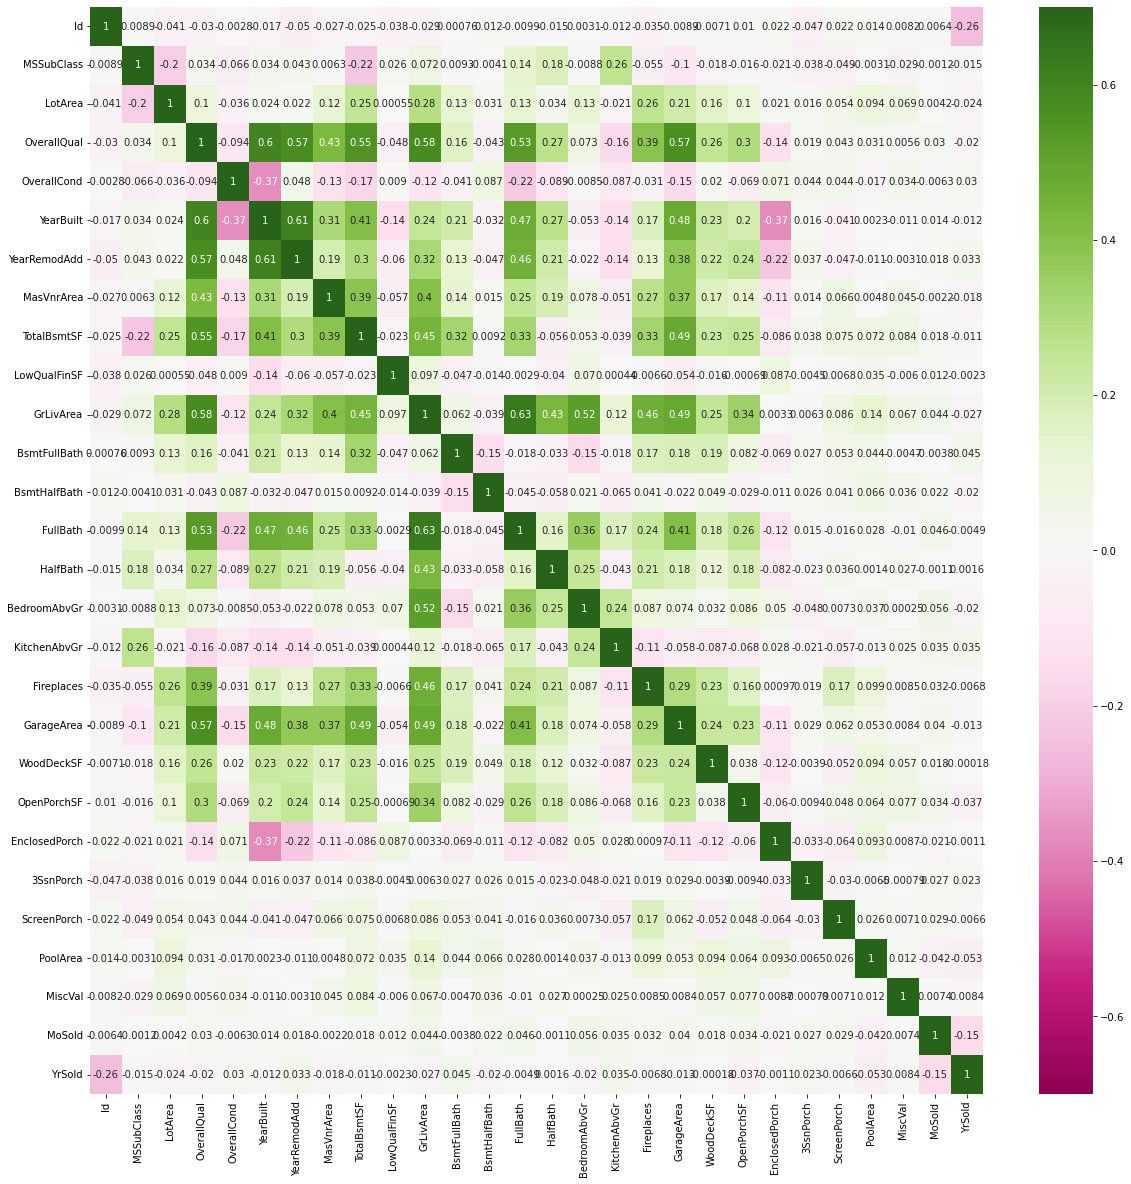

In [166]:
df_num = df.select_dtypes(np.number)
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), cmap= "PiYG", annot=True, vmin= -0.70, vmax= 0.70)

In [167]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 70, dtype: int64

In [168]:
# Correlation between Categorical variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories= [["Ex", 'Gd', 'TA', 'Fa', 'Po']])
for i in ['ExterQual', "ExterCond", "HeatingQC", "KitchenQual"]:
 df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))    

In [169]:
oe = OrdinalEncoder(categories= [["Ex", 'Gd', 'TA', 'Fa', 'Po', 'NA']])
for i in ['BsmtQual', "BsmtCond", "FireplaceQu", "GarageQual", "PoolQC"]:
 df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))  

In [170]:
df_catvarscols = df.select_dtypes('object').columns

In [171]:
licatvarscols = list(df_catvarscols)

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in licatvarscols:
    df[i] = le.fit_transform(df[i])

In [173]:
len(df.select_dtypes('object').columns)

0

<AxesSubplot:>

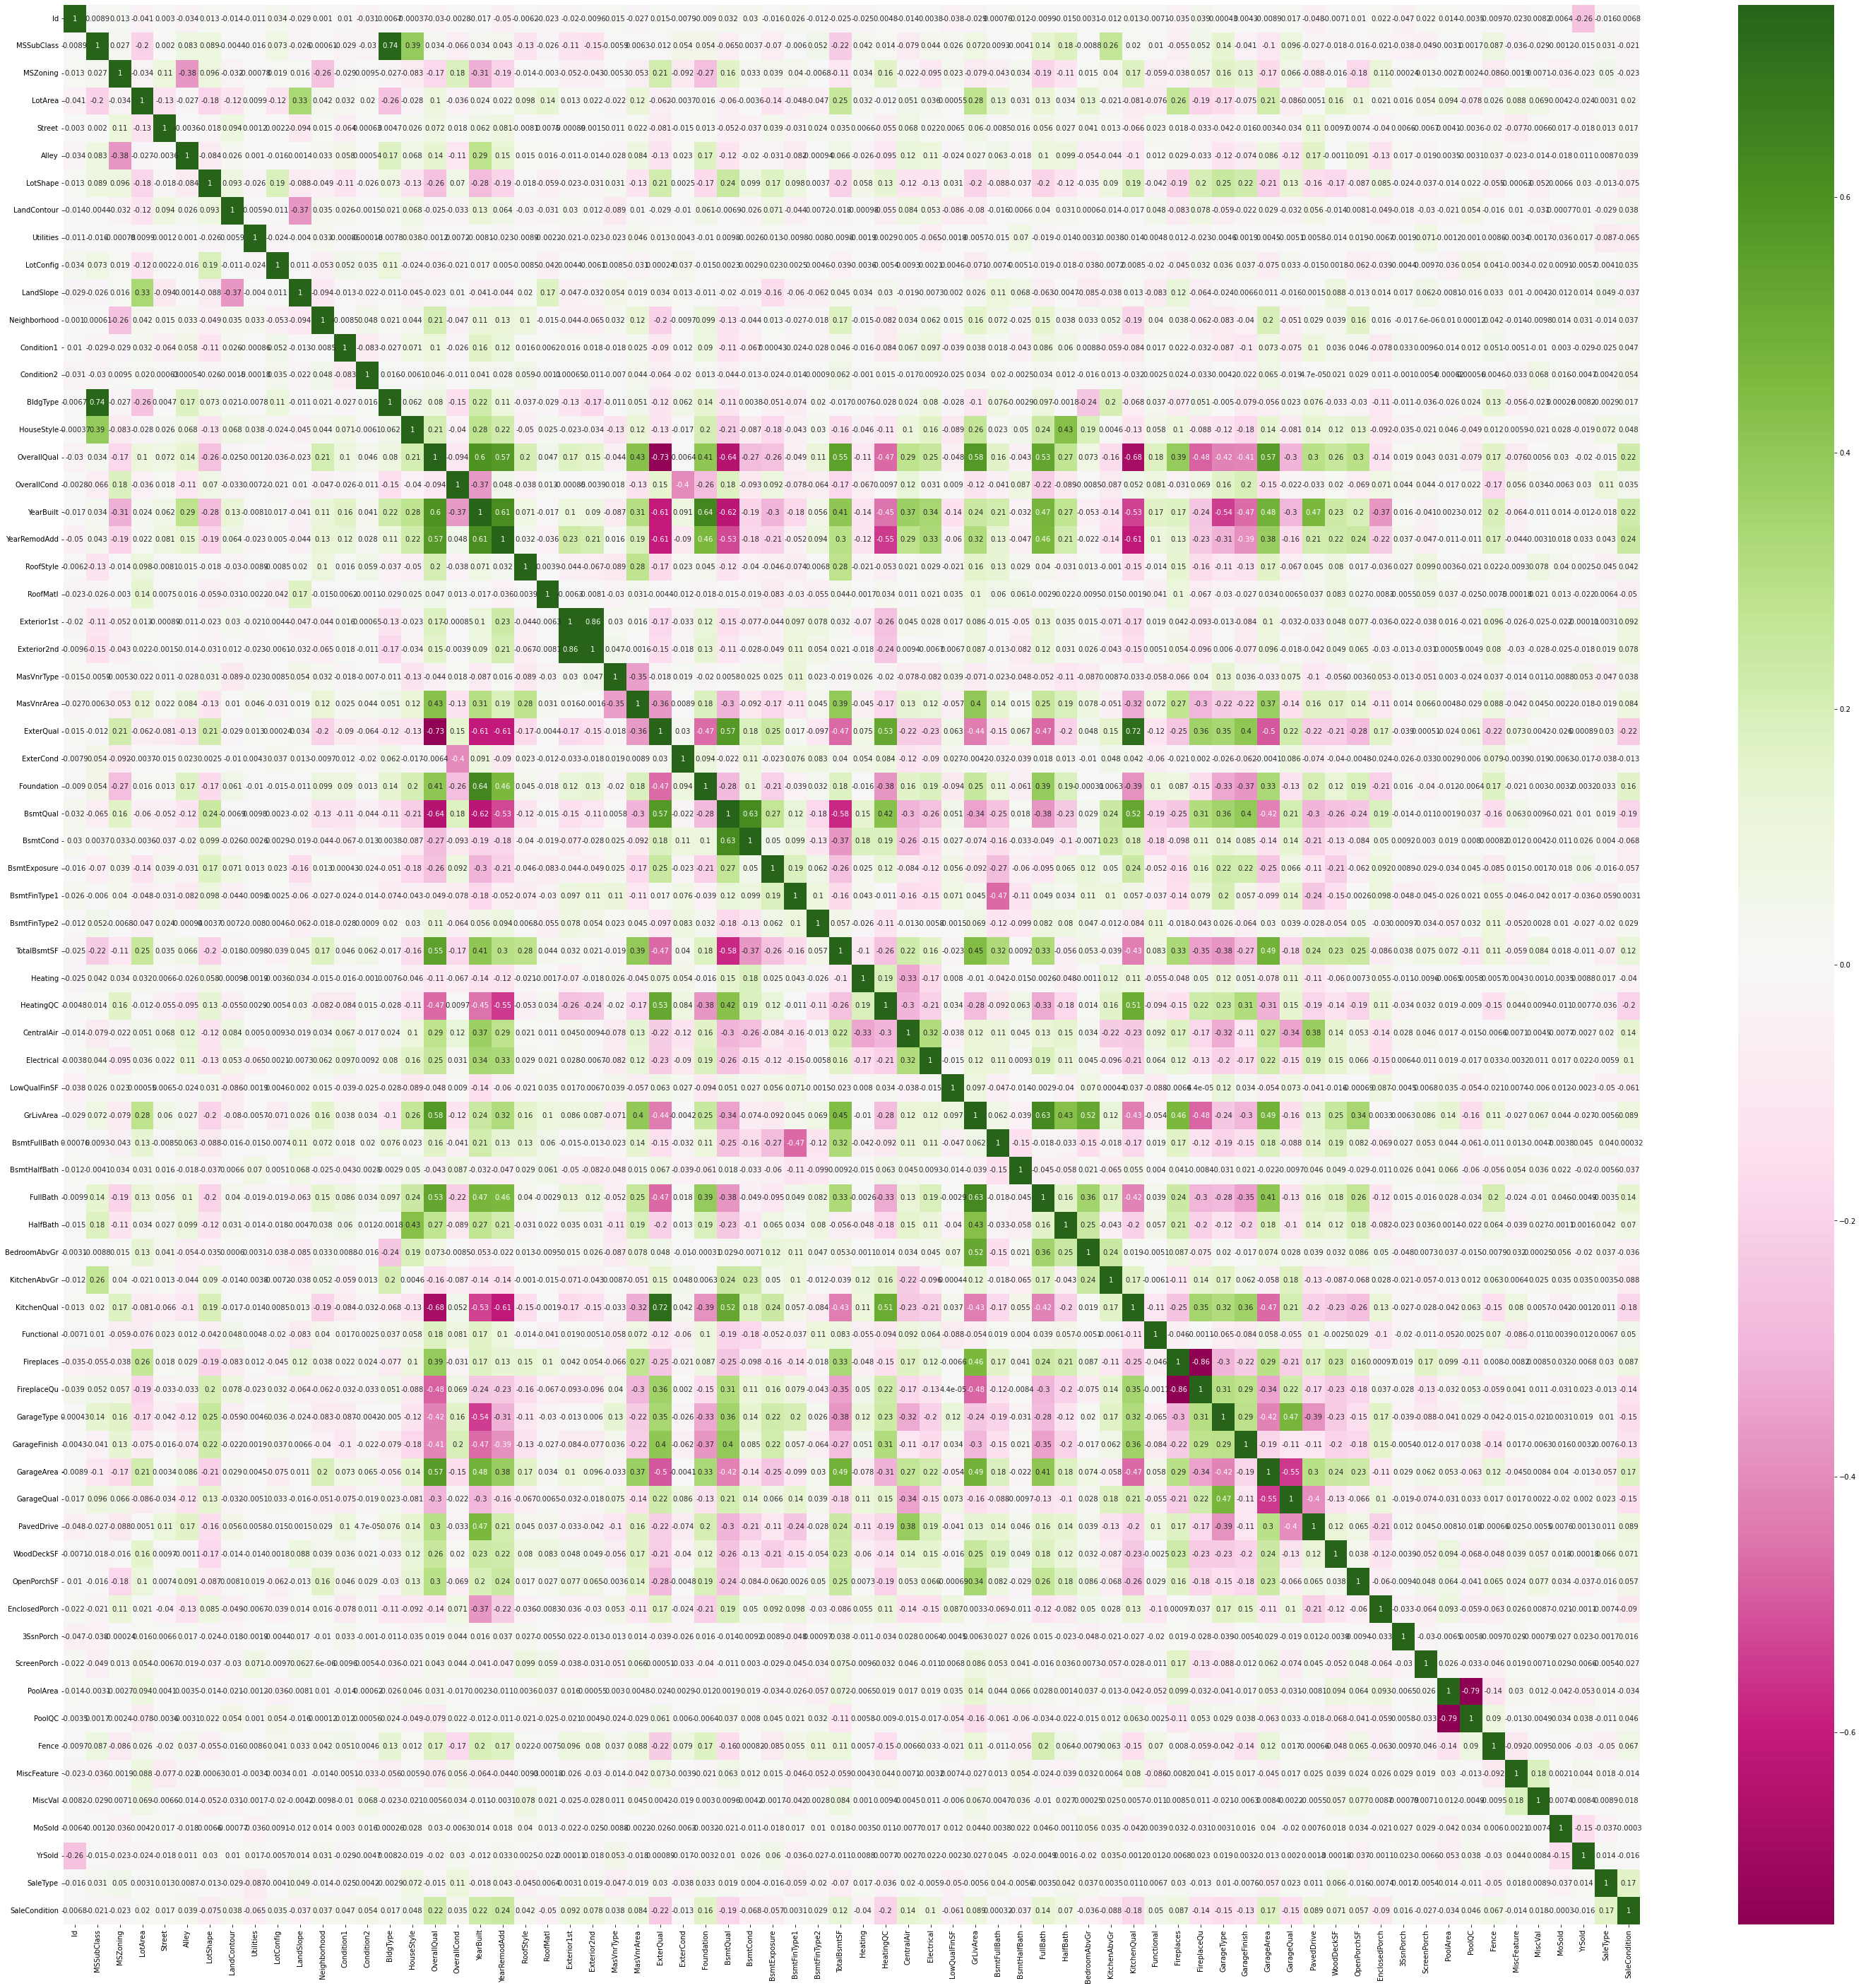

In [174]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap = 'PiYG', vmin= -0.75, vmax= 0.75)

In [175]:
# engineering correlated variables.
df["overallExteriorQC"] = (df["Exterior1st"] +df["Exterior2nd"]) / 2 

In [176]:
df.drop("BldgType", axis=1, inplace=True)

In [177]:
df.drop("PoolQC", axis=1, inplace=True)

In [178]:
len(df.columns)

69

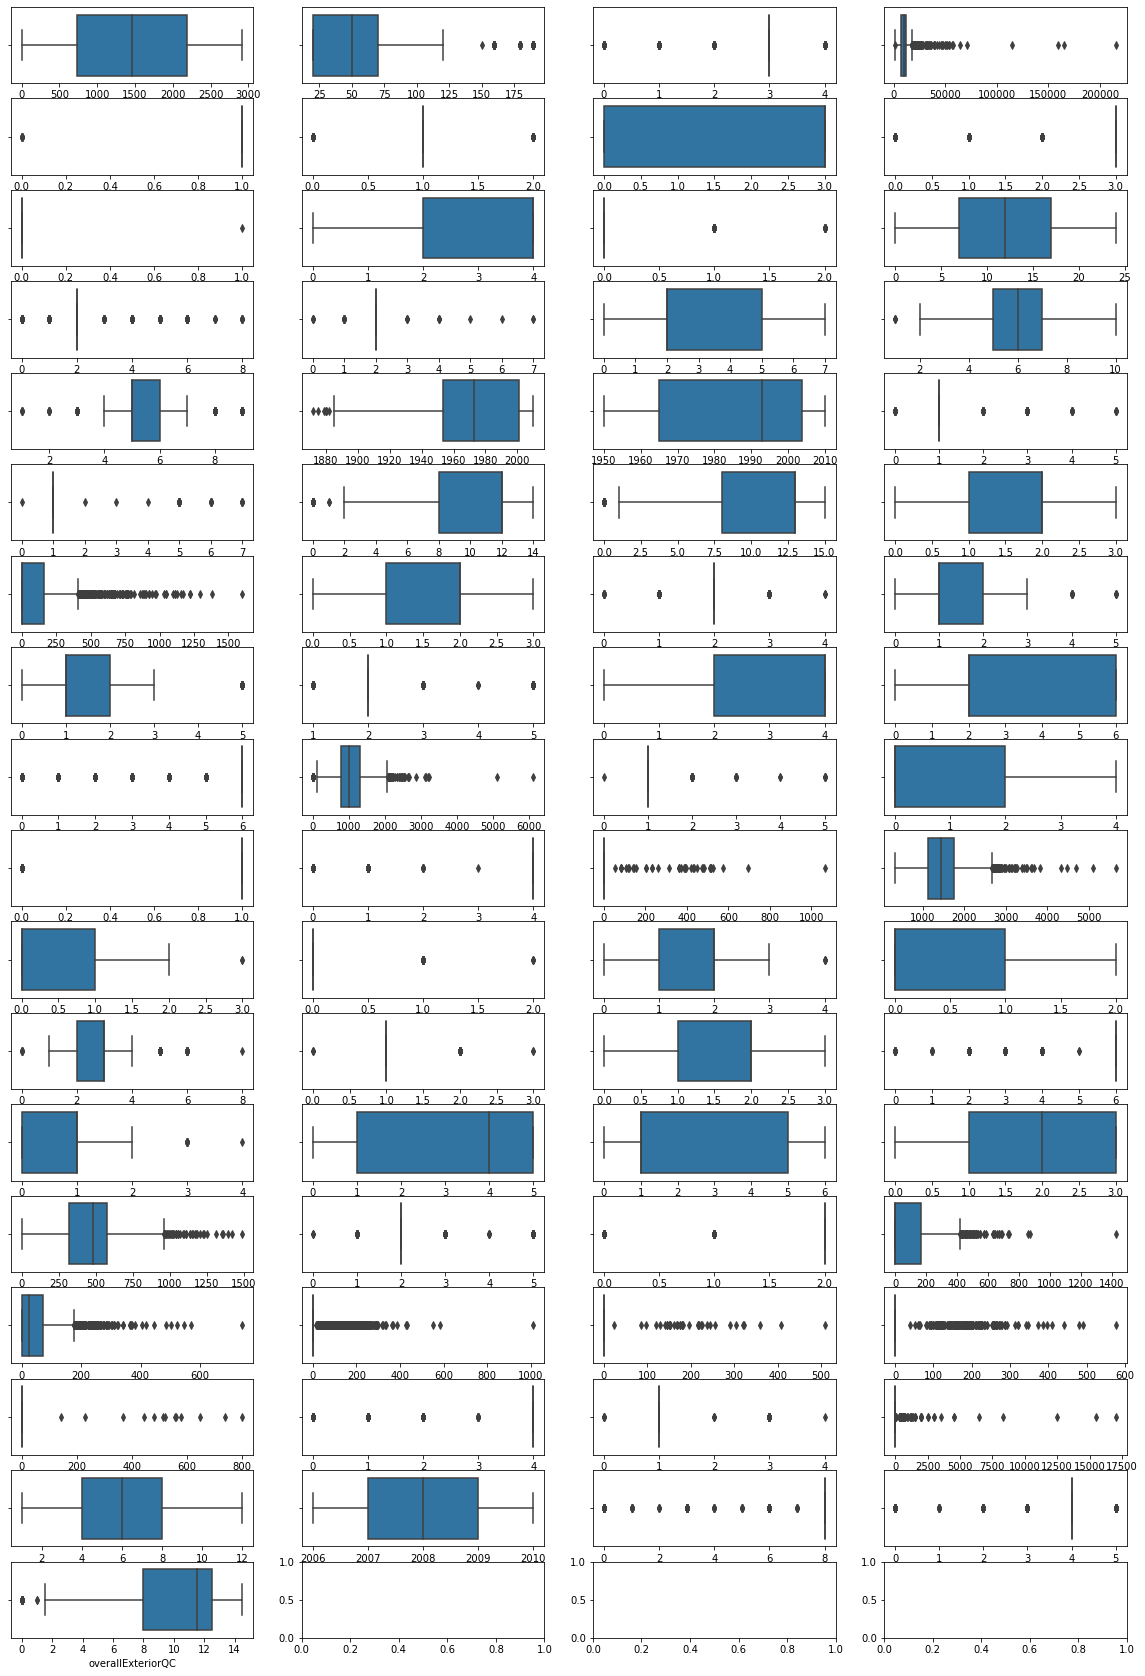

In [179]:
fig, ax = plt.subplots(nrows = 18, ncols= 4, figsize=(20, 30))

for i, subplot in zip(df.columns,  ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
plt.show()

In [180]:
from sklearn.preprocessing import power_transform
transformed = power_transform(df, method='yeo-johnson')
df_transformed = pd.DataFrame(data=transformed, columns= df.columns)

In [181]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(df)
cov_matrix=np.cov(x_sc.T)
eigenval,eigen_vector=np.linalg.eig(cov_matrix)

eigenval=eigenval/sum(eigenval)*100
print(eigenval)

[ 1.37429697e+01  4.64298053e+00  3.86275980e+00  3.92554555e+00
  3.06866691e+00  2.68022612e+00  2.49251862e+00  2.20730302e+00
  2.17740877e+00  2.04639045e+00  1.96999899e+00 -3.69824298e-16
  1.91656941e+00  1.37224284e-01  1.65525753e-01  1.96850631e-01
  2.21958901e-01  1.87481613e+00  2.65046064e-01  1.82723864e+00
  2.92889414e-01  3.31125972e-01  3.74967569e-01  3.89369316e-01
  1.75767547e+00  1.73880649e+00  4.39982122e-01  4.73909079e-01
  1.66577095e+00  5.37263099e-01  5.56644373e-01  1.62310640e+00
  1.60291681e+00  5.97795181e-01  6.14034970e-01  6.42910874e-01
  6.62987341e-01  6.86907728e-01  7.30190370e-01  1.53700745e+00
  1.50463606e+00  1.49498297e+00  1.46778825e+00  7.61527252e-01
  7.94935043e-01  1.41937775e+00  1.39240417e+00  1.38047832e+00
  1.37274833e+00  1.34181342e+00  8.32690606e-01  8.51161498e-01
  1.32054036e+00  1.27398278e+00  1.26411366e+00  1.24842280e+00
  8.83874045e-01  9.20164398e-01  1.20958868e+00  9.50414143e-01
  1.16300622e+00  1.15221

In [182]:
cum_sum=np.cumsum(eigenval)
cum_sum


array([ 13.74296969,  18.38595021,  22.24871001,  26.17425556,
        29.24292247,  31.92314859,  34.41566721,  36.62297023,
        38.800379  ,  40.84676945,  42.81676844,  42.81676844,
        44.73333785,  44.87056214,  45.03608789,  45.23293852,
        45.45489742,  47.32971355,  47.59475962,  49.42199826,
        49.71488767,  50.04601364,  50.42098121,  50.81035053,
        52.568026  ,  54.30683249,  54.74681461,  55.22072369,
        56.88649464,  57.42375774,  57.98040211,  59.60350851,
        61.20642532,  61.8042205 ,  62.41825547,  63.06116635,
        63.72415369,  64.41106142,  65.14125179,  66.67825924,
        68.1828953 ,  69.67787826,  71.14566651,  71.90719376,
        72.70212881,  74.12150656,  75.51391072,  76.89438904,
        78.26713737,  79.60895078,  80.44164139,  81.29280289,
        82.61334325,  83.88732603,  85.15143969,  86.39986249,
        87.28373654,  88.20390094,  89.41348962,  90.36390376,
        91.52690998,  92.67912718,  93.65260331,  94.64

In [191]:
from sklearn.decomposition import PCA
mpca=PCA(n_components=59)
da=mpca.fit_transform(x_sc)

pca_df=pd.DataFrame(da)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,2.197168,-1.624822,-0.935913,-1.375114,-0.630152,0.937694,0.256521,-0.682445,0.574025,0.474170,...,0.045546,0.327780,0.322455,0.171251,0.015002,-0.084246,-0.849672,0.180843,-0.159096,0.492745
1,0.274782,1.749096,-1.120214,1.007755,-0.749828,-0.361614,-0.191632,0.593005,0.730859,0.042590,...,0.239132,0.406675,-0.438478,-1.041428,0.685164,0.203786,0.419715,-0.591585,0.399990,0.759062
2,3.195931,-0.943606,-0.148811,-0.359046,-0.548305,1.486073,0.005441,-0.987023,-0.081577,-0.142088,...,0.129571,0.224006,0.437698,-0.056945,-0.057655,-0.008754,-0.363460,0.231835,0.090493,0.344838
3,-1.065727,-0.809502,0.488522,2.688352,-1.237997,0.050321,-0.530304,-1.066344,-0.410811,2.849479,...,-0.413672,0.366598,-0.918463,0.650074,-0.637755,0.661388,-1.095190,0.111188,-1.208806,-0.465683
4,4.624028,-0.363308,1.122004,0.083743,-0.668526,1.250633,0.220967,-0.774412,0.831159,0.605333,...,0.336496,0.185649,0.144533,-0.591261,0.234170,-0.107612,0.143717,0.405701,0.219386,0.137056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-4.057761,0.302311,-0.140097,-3.668368,-1.770871,-0.167845,-3.399771,-0.877592,-1.042076,-0.423239,...,-0.571852,0.081187,0.251465,0.180433,0.602144,-0.034417,0.114172,0.151860,-0.013230,0.527037
2915,-3.676208,1.465106,-0.301643,-3.231120,-1.602172,0.280261,-0.741423,-1.410793,-1.706792,0.453028,...,-0.121256,-0.094064,0.299613,-0.120535,0.005088,-0.121041,0.214996,0.160286,0.265142,-0.578029
2916,-0.753554,-0.262685,-0.642097,2.358969,-0.623505,0.486095,0.009000,-0.846982,0.560672,1.017594,...,0.412962,0.734730,-0.491688,0.488802,0.954639,0.814598,0.467981,-0.532436,0.003435,-0.737958
2917,-2.264779,-0.265160,-0.989888,-1.326863,0.002790,2.416734,-2.224027,-0.364375,1.096134,1.718040,...,0.195696,-0.086363,1.281003,0.954421,-0.363409,0.270979,-0.382296,-0.390530,0.047106,0.086311


In [192]:
X_train = pca_df[:1460]
X_test = pca_df[1460:]

In [193]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
ytrainpred = xgbr.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

184.3967705955151


In [194]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ytrainpred = logreg.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

5660.991254745177


In [195]:
from xgboost import XGBRegressor
xgbrtp = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgbrtp.fit(X_train, y_train)
ytrainpred = xgbrtp.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

[00:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


8878.113696619763


In [196]:
testpred = xgbrtp.predict(X_test)

In [197]:
testsub = pd.DataFrame(data= {"id":range(1461, 2920), "SalePrice":(testpred)})
testsub.to_csv("subpca2.csv", index=False)